In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [2]:
df_bank = pd.read_csv('bank.csv')

In [4]:
df_bank.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
# Sacar del dataset las columnas que no aportan información relevante
# sacar Loan_ID
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             0 non-null      float64
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


In [17]:
df_bank1 = pd.read_csv('bank.csv')

In [18]:
df_bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
# Rellenamos Gender nulos

print("Nulos en Gender:", df_bank1['Gender'].isnull().sum())

Nulos en Gender: 13


In [22]:
# Calcular las proporciones existentes (ignorando los NaN)
gender_distribution = df_bank1['Gender'].value_counts(normalize=True, dropna=True).round(2)

In [23]:
gender_distribution

Gender
Male      0.81
Female    0.19
Name: proportion, dtype: float64

In [24]:
# Imputar valores nulos según la distribución
null_indices = df_bank1[df_bank1['Gender'].isnull()].index
df_bank1.loc[null_indices, 'Gender'] = np.random.choice(
    gender_distribution.index,
    size=len(null_indices),
    p=gender_distribution.values
)

In [25]:
# Verificar que ya no hay nulos
print("\n¿Hay nulos en Gender después de imputar? ", df_bank1['Gender'].isnull().any())


¿Hay nulos en Gender después de imputar?  False


In [26]:
df_bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [28]:
df_bank1['Gender'].value_counts()

Gender
Male      501
Female    113
Name: count, dtype: int64

In [30]:
# Cambiar los valores de Gender por valores numéricos: Male=1, Female=0
df_bank1['Gender'] = df_bank1['Gender'].map({'Male': 1, 'Female': 0})

In [32]:
df_bank1['Gender'].value_counts()

Gender
1    501
0    113
Name: count, dtype: int64

In [33]:
# Hacemos el mismo proceso con Married

print("Nulos en Married:", df_bank1['Married'].isnull().sum())

Nulos en Married: 3


In [35]:
#Proporciones de Married
married_distribution = df_bank1['Married'].value_counts(normalize=True, dropna=True).round(2)
married_distribution

Married
Yes    0.65
No     0.35
Name: proportion, dtype: float64

In [42]:
# Imputar valores nulos según la distribución
null_indices = df_bank1[df_bank1['Married'].isnull()].index
df_bank1.loc[null_indices, 'Married'] = np.random.choice(
    married_distribution.index,
    size=len(null_indices),
    p=married_distribution.values
)

In [51]:
df_bank2 = pd.read_csv('bank.csv')

In [52]:
gender_distribution = df_bank2['Gender'].value_counts(normalize=True, dropna=True).round(2)

In [56]:
null_indices = df_bank2[df_bank2['Gender'].isnull()].index
df_bank2.loc[null_indices, 'Gender'] = np.random.choice(
    gender_distribution.index,
    size=len(null_indices),
    p=gender_distribution.values
)

In [57]:
df_bank2['Gender'].value_counts()

Gender
Male      500
Female    114
Name: count, dtype: int64

In [58]:
df_bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [59]:
df_bank2['Gender'] = df_bank2['Gender'].map({'Male': 1, 'Female': 0})

In [60]:
df_bank2['Gender'].value_counts()

Gender
1    500
0    114
Name: count, dtype: int64

In [61]:
married_distribution = df_bank2['Married'].value_counts(normalize=True, dropna=True).round(2)

null_indices = df_bank2[df_bank2['Married'].isnull()].index
df_bank2.loc[null_indices, 'Married'] = np.random.choice(
    married_distribution.index,
    size=len(null_indices),
    p=married_distribution.values
)

In [62]:
df_bank2['Married'].value_counts()

Married
Yes    400
No     214
Name: count, dtype: int64

In [63]:
df_bank2['Married'] = df_bank2['Married'].map({'Yes': 1, 'No': 0})

In [64]:
df_bank2['Married'].value_counts()

Married
1    400
0    214
Name: count, dtype: int64

In [65]:
df_bank2['Dependents'].value_counts() 

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [ ]:
#eliminar en Dependents que sean '3+' eliminar el '+'ArithmeticError

df_bank2['Dependents'] = df_bank2['Dependents'].replace({'3+': '3'})


In [67]:
df_bank2['Dependents'].value_counts()

Dependents
0    345
1    102
2    101
3     51
Name: count, dtype: int64

In [72]:
# Rellenar los valores nulos de 'Dependents' con la moda
mode_dependents = df_bank2['Dependents'].mode()[0]
df_bank2['Dependents'].fillna(mode_dependents, inplace=True)

C:\Users\Luis\AppData\Local\Temp\ipykernel_31564\981210735.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank2['Dependents'].fillna(mode_dependents, inplace=True)


In [73]:
df_bank2['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [74]:
df_bank3 = df_bank2.copy()

In [75]:
df_bank3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [76]:
df_bank3['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [77]:
df_bank3['Education'] = df_bank3['Education'].map({'Graduate': 1, 'Not Graduate': 0})

In [78]:
df_bank3['Education'].value_counts()

Education
1    480
0    134
Name: count, dtype: int64

In [79]:
df_bank3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(4), object(5)
memory usage: 62.5+ KB


In [81]:
df_bank3['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [82]:
self_employed_distribution = df_bank3['Self_Employed'].value_counts(normalize=True, dropna=True).round(2)

# Imputar valores nulos según la distribución

null_indices_self_employed = df_bank3[df_bank3['Self_Employed'].isnull()].index
df_bank3.loc[null_indices_self_employed, 'Self_Employed'] = np.random.choice(
    self_employed_distribution.index,
    size=len(null_indices_self_employed),
    p=self_employed_distribution.values
)

In [83]:
df_bank3['Self_Employed'].value_counts()

Self_Employed
No     527
Yes     87
Name: count, dtype: int64

In [84]:
df_bank3['Self_Employed'] = df_bank3['Self_Employed'].map({'Yes': 1, 'No': 0})

In [85]:
df_bank3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(5), object(4)
memory usage: 62.5+ KB


In [86]:
df_bank3['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [87]:
# Convertir Dependents a numérico

df_bank3['Dependents'] = df_bank3['Dependents'].astype(int)
df_bank3['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [88]:
df_bank3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(6), object(3)
memory usage: 62.5+ KB


In [89]:
# Rellenar nulos de 'LoanAmount' con la mediana

loan_amount_median = df_bank3['LoanAmount'].median()
df_bank3['LoanAmount'].fillna(loan_amount_median, inplace=True)
df_bank3['LoanAmount'].isnull().sum()  # Verificar que no hay nulos

C:\Users\Luis\AppData\Local\Temp\ipykernel_31564\3957319045.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank3['LoanAmount'].fillna(loan_amount_median, inplace=True)


np.int64(0)

In [90]:
df_bank3.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(6), object(3)
memory usage: 62.5+ KB


In [91]:
df_bank3['Loan_Amount_Term'].value_counts() 

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [92]:
loan_term_moda = df_bank3['Loan_Amount_Term'].mode()[0]
# Rellenar nulos de 'Loan_Amount_Term' con la moda
df_bank3['Loan_Amount_Term'].fillna(loan_term_moda, inplace=True)   

C:\Users\Luis\AppData\Local\Temp\ipykernel_31564\1594017064.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank3['Loan_Amount_Term'].fillna(loan_term_moda, inplace=True)


In [93]:
df_bank3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(6), object(3)
memory usage: 62.5+ KB


In [94]:
df_bank3['Credit_History'].value_counts()   

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [95]:
credit_history_distribution = df_bank3['Credit_History'].value_counts(normalize=True, dropna=True).round(2)

# Imputar valores nulos según la distribución
null_indices_credit_history = df_bank3[df_bank3['Credit_History'].isnull()].index
df_bank3.loc[null_indices_credit_history, 'Credit_History'] = np.random.choice(
    credit_history_distribution.index,
    size=len(null_indices_credit_history),
    p=credit_history_distribution.values
)

In [96]:
df_bank3['Credit_History'].value_counts()   

Credit_History
1.0    524
0.0     90
Name: count, dtype: int64

In [97]:
df_bank3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(6), object(3)
memory usage: 62.5+ KB


In [98]:
df_bank4 = df_bank3.copy()

In [99]:
df_bank4['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [100]:
df_bank4['Property_Area'] = df_bank4['Property_Area'].map({
    'Urban': 2,
    'Semiurban': 1,
    'Rural': 0
})

In [101]:
df_bank4['Property_Area'].value_counts()

Property_Area
1    233
2    202
0    179
Name: count, dtype: int64

In [102]:
df_bank4['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [103]:
df_bank4['Loan_Status'] = df_bank4['Loan_Status'].map({'Y': 1, 'N': 0})

In [104]:
df_bank4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


In [108]:
#Eliminar ID

df_bank4 = df_bank4.drop(columns=['Loan_ID'])

In [109]:
df_bank_fixed = df_bank4.copy()

In [110]:
# exportar el DataFrame limpio a un nuevo archivo CSV
df_bank_fixed.to_csv('bank_fixed.csv', index=False)

In [111]:
df_bank_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [113]:
# Variables independientes (todas menos 'Loan_Status')
X = df_bank_fixed.drop('Loan_Status', axis=1)

# Variable dependiente (aunque no se usa en PCA, la guardamos para después)
y = df_bank_fixed['Loan_Status']

In [114]:
# Estandarizar las características (media = 0, varianza = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [115]:
# Inicializar PCA sin número fijo de componentes (para ver explicación de varianza)
pca = PCA()
pca.fit(X_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [118]:
# Obtener la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.17401664, 0.13429372, 0.10390078, 0.09722207, 0.09175978,
       0.0900078 , 0.07867684, 0.07348502, 0.0721022 , 0.05295548,
       0.03157968])

In [120]:
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

print("Número de componentes para explicar el 95% de la varianza:", pca_95.n_components_)


Número de componentes para explicar el 95% de la varianza: 10


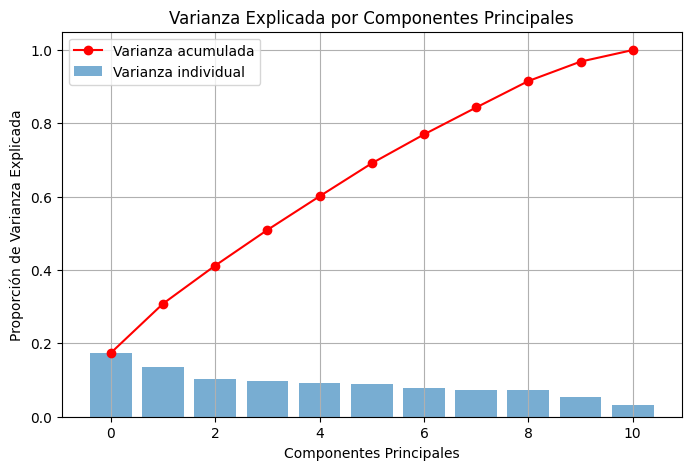

In [117]:
# Graficar la varianza explicada acumulada
plt.figure(figsize=(8,5))
plt.bar(range(11), explained_variance, alpha=0.6, label='Varianza individual')
plt.plot(range(11), np.cumsum(explained_variance), 'r-o', label='Varianza acumulada')
plt.xlabel('Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Varianza Explicada por Componentes Principales')
plt.legend()
plt.grid(True)
plt.show()

In [121]:
# Aplicar PCA con 10 componentes para visualización
pca_10 = PCA(n_components=10)
X_pca = pca_10.fit_transform(X_scaled)

In [123]:
# Agregar la variable objetivo al DataFrame transformado
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_df['Loan_Status'] = y.values

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Loan_Status
0,-0.919142,0.802035,0.622731,0.777244,0.275811,-0.792205,0.102958,-0.896315,-0.469485,-0.977685,1
1,0.365936,-0.460726,0.189245,-1.266609,0.674713,-0.227259,-0.346974,0.092854,0.809236,0.101994,0
2,-0.157611,0.004291,-0.182253,1.158101,1.207784,0.304240,2.527465,-0.882479,0.550188,0.535425,1
3,-0.528029,-1.345702,0.116755,0.323991,0.091906,-0.104060,0.335937,-0.698681,-1.907062,0.837512,1
4,-0.825976,0.868262,0.629948,0.764702,0.255081,-0.785974,0.075279,-0.899280,-0.513916,-0.964500,1
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.296740,1.421898,-0.271141,-0.570476,0.409469,0.274923,-0.890963,1.013160,0.825172,0.177388,1
610,0.816530,-2.138929,-0.644559,0.685297,0.963751,0.114311,-1.562427,1.124356,2.181215,-0.862725,1
611,1.284830,0.295907,0.685667,0.528991,0.214144,-1.276500,0.185975,-0.189436,-0.561127,0.244086,1
612,1.204049,-0.308298,0.438397,0.653296,0.315564,-1.525166,0.375930,0.505182,-0.277981,-0.272776,1


In [126]:
# Ver los loadings (pesos) de las variables originales en los componentes
loadings = pd.DataFrame(pca_10.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], index=X.columns)
loadings_sorted = loadings.sort_values(by='PC1', key=abs, ascending=False)  
print(loadings_sorted)  

                        PC1       PC2       PC3       PC4       PC5       PC6  \
LoanAmount         0.529073  0.358250  0.080550 -0.100992 -0.134134  0.060813   
ApplicantIncome    0.457758  0.436941 -0.211942  0.124522  0.000778 -0.128382   
Married            0.407721 -0.424975  0.059063 -0.082818  0.093574 -0.196373   
Dependents         0.386405 -0.299671 -0.153654  0.043067 -0.031613 -0.164977   
Gender             0.336665 -0.388573  0.072600 -0.176426  0.141385 -0.090133   
Self_Employed      0.177808  0.196112 -0.337726  0.187714  0.222146  0.520837   
CoapplicantIncome  0.141756 -0.112170  0.592997 -0.149547 -0.334733  0.580539   
Loan_Amount_Term  -0.124253  0.262033  0.055632 -0.605626 -0.013832 -0.365410   
Education          0.117128  0.370727  0.501400  0.042063  0.050674 -0.235096   
Property_Area     -0.026841 -0.029359  0.297001  0.712007 -0.159991 -0.320461   
Credit_History    -0.007928  0.036616  0.328348  0.036714  0.873219  0.078300   

                        PC7

In [128]:
#Exportar loadings_sorted como CSV
loadings_sorted.to_csv('pca_loadings.csv')

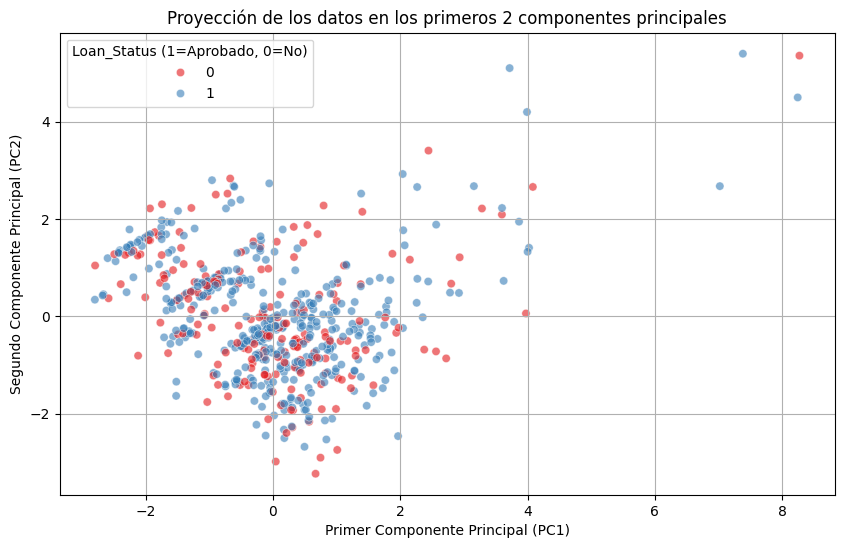

In [127]:
# Proyectar los datos en los primeros 2 componentes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', alpha=0.6)
plt.title('Proyección de los datos en los primeros 2 componentes principales')
plt.xlabel('Primer Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.legend(title='Loan_Status (1=Aprobado, 0=No)')
plt.grid(True)
plt.show()